In [34]:
import numpy as np

In [36]:
import pandas as pd

In [37]:
import matplotlib.pyplot as plt

In [38]:
from keras.models import Model

In [39]:
from keras.layers import Flatten, Dense

In [40]:
from keras.applications.mobilenet import MobileNet, preprocess_input 


In [41]:
from keras.losses import categorical_crossentropy

In [42]:
from keras.preprocessing.image import img_to_array, load_img

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Building the Model

In [44]:
# Pretained model
base_model = MobileNet(input_shape=(224, 224, 3), include_top=False)
print(base_model)
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7, activation='softmax')(x)

# Creating our model
model = Model(base_model.input, x)

<Functional name=mobilenet_1.00_224, built=True>


In [45]:
# All the layers of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,580,103 (13.66 MB)

 Trainable params: 351,239 (1.34 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [46]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

# Prepare the data using Data Generator

In [47]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    rescale = 1./255
)
train_datagen

In [48]:
train_data = train_datagen.flow_from_directory(
    directory='./dataset/train', 
    target_size=(224, 224),
    batch_size = 32
)
train_data

Found 28708 images belonging to 7 classes.


In [49]:
train_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [50]:
val_datagen = ImageDataGenerator(rescale=1/255)
val_datagen

In [51]:
val_data = val_datagen.flow_from_directory(
    directory='./dataset/test', 
    target_size=(224, 224),
    batch_size = 32
)
val_data

Found 7178 images belonging to 7 classes.


# Visualizing the data that is fed to train data generator

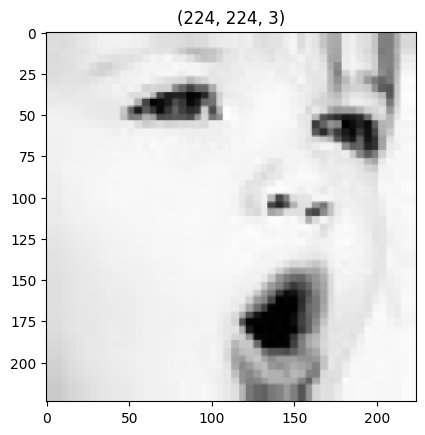

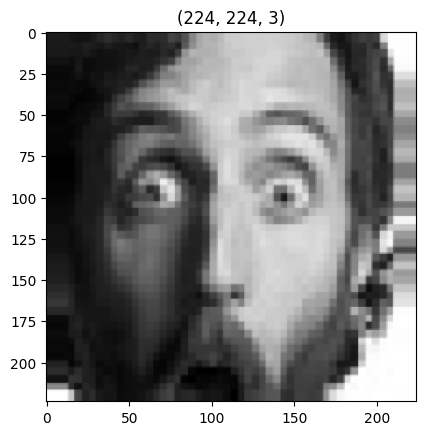

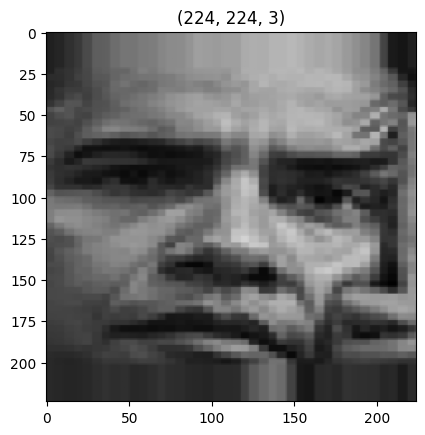

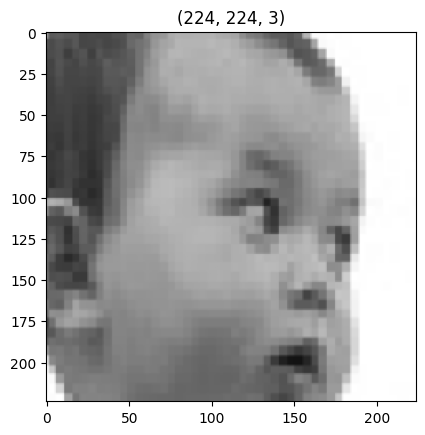

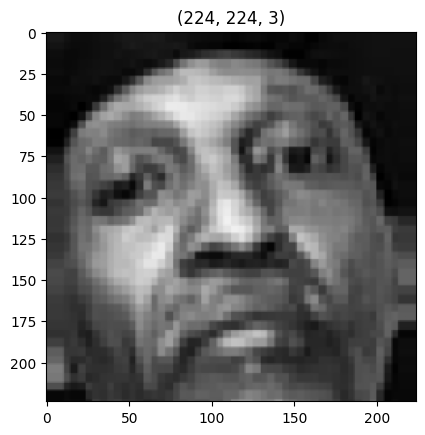

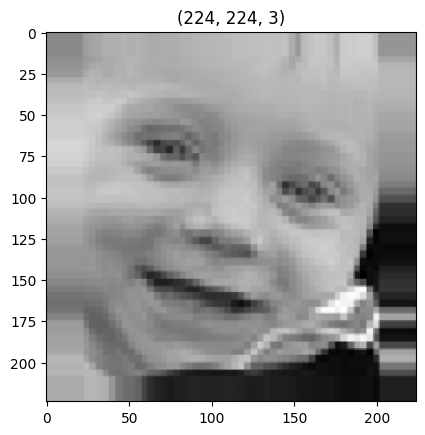

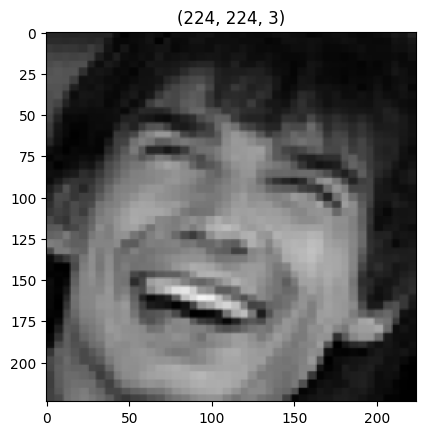

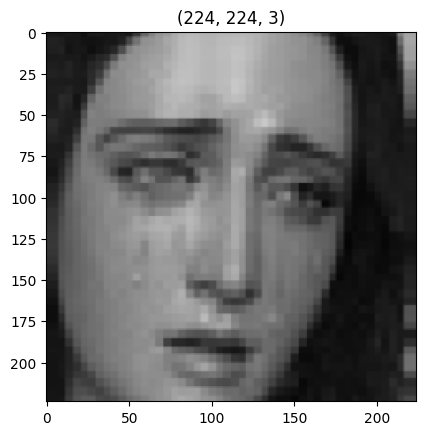

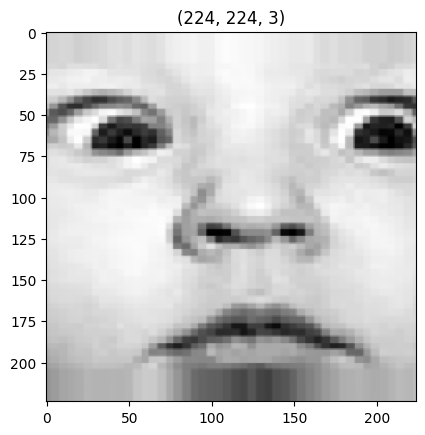

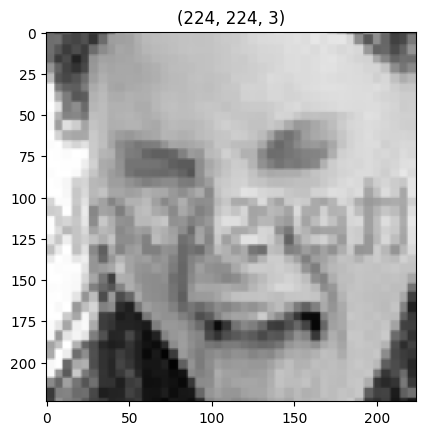

In [52]:
# Visualize the images in the training data generator
t_img, label = next(train_data)

# Function to plot the images
def plotImages(img_arr, label):
    """
    input : images array
    output : plots the images
    """
    count = 0
    for im, l in zip(img_arr, label):
        plt.imshow(im)
        plt.title(im.shape)
        plt.axis = False
        plt.show()

        count += 1
        if count == 10:
            break

plotImages(t_img, label)

# Fit the model

In [54]:
hist = model.fit(train_data,
                steps_per_epoch= 100,
                epochs=50,
                validation_data = val_data,
                validation_steps= 30,
                )

Epoch 1/50


d:\HOANG\ComputerVision\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3063 - loss: 11.9396
Epoch 1: val_accuracy improved from -inf to 0.46562, saving model to best_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.3068 - loss: 11.9067 - val_accuracy: 0.4656 - val_loss: 5.1534
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4210 - loss: 5.7201
Epoch 2: val_accuracy did not improve from 0.46562
100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.4210 - loss: 5.7250 - val_accuracy: 0.4563 - val_loss: 5.2907
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4589 - loss: 5.8904
Epoch 3: val_accuracy did not improve from 0.46562
100/100 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.4590 - loss: 5.8942 - val_accuracy: 0.4635 - val_loss: 6.9370
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4548 - loss: 6.7661
Epoch 4: val_accuracy did not improve from 0.46562
100/100 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.4548 - loss: 6.7645 

D:\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 8: val_accuracy did not improve from 0.49896
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 949ms/step - accuracy: 0.5152 - loss: 6.6873 - val_accuracy: 0.4105 - val_loss: 8.6355
Epoch 9/50
 98/100 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step - accuracy: 0.4877 - loss: 7.1413
Epoch 9: val_accuracy did not improve from 0.49896
100/100 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.4880 - loss: 7.1391 - val_accuracy: 0.4708 - val_loss: 8.4643
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 912ms/step - accuracy: 0.5229 - loss: 6.7995
Epoch 10: val_accuracy did not improve from 0.49896
100/100 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.5228 - loss: 6.7996 - val_accuracy: 0.4594 - val_loss: 8.9634
Epoch 10: early stopping


In [55]:
# Load the best fit model
from keras.models import load_model
model = load_model("best_model.keras")

In [56]:
h = hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

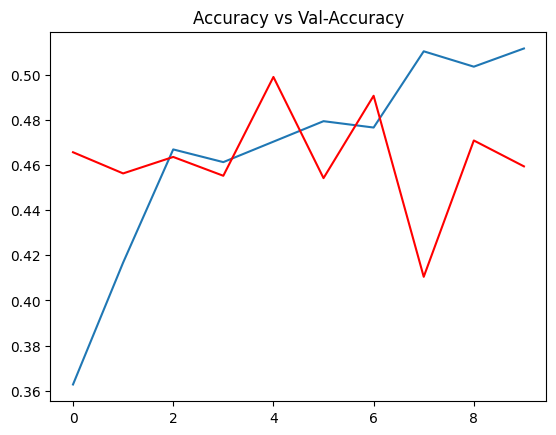

In [57]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("Accuracy vs Val-Accuracy")
plt.show()

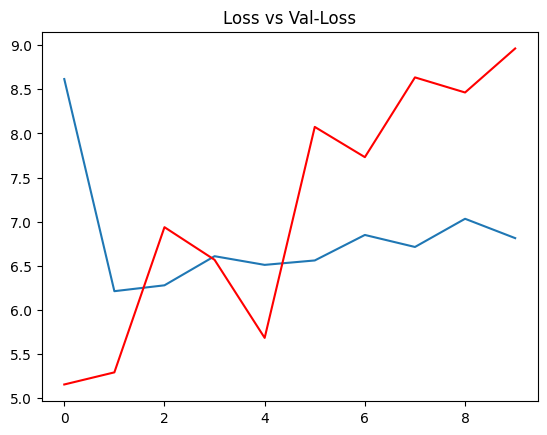

In [58]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("Loss vs Val-Loss")
plt.show()

In [59]:
op = dict(zip(train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
The person in image is happy


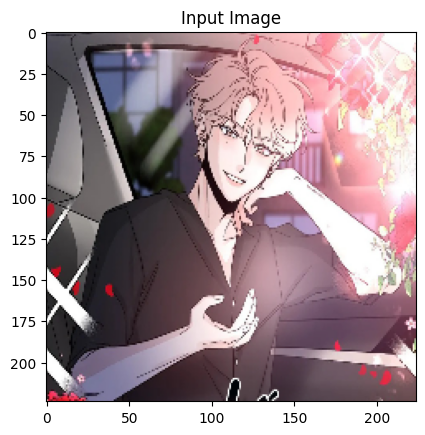

In [61]:
path = "LeeJooBin.png"
img = load_img(path, target_size=(224, 224))

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f"The person in image is {op[pred]}")

# Display the image
plt.imshow(input_arr[0])
plt.title("Input Image")
plt.show()